### Basic Data Cleaning
###  How to identify and remove column variables that only have a single value.
###  How to identify and consider column variables with very few unique values.
###  How to identify and remove rows that contain duplicate observations.


### Overview
### 1. Messy Datasets
### 2. Identify Columns That Contain a Single Value
### 3. Delete Columns That Contain a Single Value
### 4. Consider Columns That Have Very Few Values
### 5. Remove Columns That Have A Low Variance
### 6. Identify Rows that Contain Duplicate Data
### 7. Delete Rows that Contain Duplicate Data

### Messy Datasets
### Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model.


### Identify Columns That Contain a Single Value
### Columns that have a single observation or value are probably useless for modeling. These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero.


In [13]:
import pandas as pd
data = pd.read_csv('oil-spill.csv')
print('Shape of dataset', data.shape)
data.head(2)

Shape of dataset (936, 50)


,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,...,2850,1000,763.16,135.46,3.73,0.6,33243.19,65.74,7.95,1.1
0,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.0,11500.0,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
1,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.0,250.0,150.00,45.13,9.33,1,31692.84,65.81,7.84,1


In [11]:
# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
    print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [14]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# summarize the number of unique values in each column
print(df.nunique())


0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [21]:
# Delete Columns That Contain a Single Value
#Variables or columns that have a single value should probably be removed from your dataset
# delete columns with a single unique value
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
todel = [i for i,v in enumerate(counts) if v == 1]
print('Columns Name to be deleted/dropped: ',todel)
# drop useless columns
df.drop(todel,axis=1,inplace=True)
print(df.shape)

(937, 50)
Columns Name to be deleted/dropped:  [22]
(937, 49)


In [35]:
#Consider Columns That Have Very Few Values
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique

# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')

# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [37]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')

# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))


21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [39]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv

# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)

# get number of unique values for each column
counts = df.nunique()

# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)


(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


In [42]:
#Remove Columns That Have A Low Variance
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)


(937, 49) (937,)
(937, 48)


(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


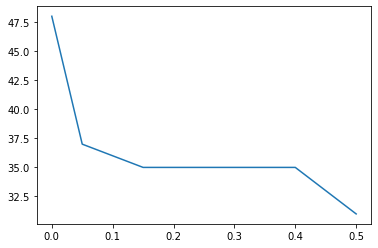

In [44]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)

# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()


In [45]:
# Identify Rows That Contain Duplicate Data


In [47]:
# locate rows of duplicate data
from pandas import read_csv
# load the dataset
df = read_csv('iris.csv', header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [52]:
#Delete Rows That Contain Duplicate Data
# delete rows of duplicate data from the dataset
from pandas import read_csv
# load the dataset
df = read_csv('iris.csv', header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)


(150, 5)
(147, 5)


# Outlier Identification and Removal

### Overview
### 1. What are Outliers?
### 2. Test Dataset
### 3. Standard Deviation Method
### 4. Interquartile Range Method
### 5. Automatic Outlier Detection


In [54]:
#What are Outliers?
#An outlier is an observation that is unlike the other observations. They are rare, distinct, or do not fit in some way.


In [56]:
#Test Dataset
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


mean=50.049 stdv=4.994


### Standard Deviation Method
### If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

###  1 Standard Deviation from the Mean: 68 percent.
###  2 Standard Deviations from the Mean: 95 percent.
###  3 Standard Deviations from the Mean: 99.7 percent.


In [61]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50

# calculate summary statistics
data_mean, data_std = mean(data), std(data)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


### Interquartile Range Method
### Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution. A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short

In [65]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


### Automatic Outlier Detection
### In machine learning, an approach to tackling the problem of outlier detection is one-class classification.
### A one-class classifier aims at capturing characteristics of training instances, in order to be able to distinguish between them and potential outliers to appear.


In [69]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)
MAE: 3.417


In [71]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


# How to Mark and Remove Missing Data

###  How to mark invalid or corrupt values as missing in your dataset.
###  How to confirm that the presence of marked missing values causes problems for learning algorithms.
###  How to remove rows with missing data from your dataset and evaluate a learning algorithm on the transformed dataset.


### Overview
### 1. Diabetes Dataset
### 2. Mark Missing Values
### 3. Missing Values Cause Problems
### 4. Remove Rows With Missing Values

In [74]:
# Diabetes Dataset

In [76]:
# Mark Missing Values
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the dataset
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [77]:
# load the dataset and review rows
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the first 20 rows of data
print(dataset.head(20))


     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [78]:
# example of summarizing the number of missing values for each variable
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# count the number of missing values for each column
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)


1      5
2     35
3    227
4    374
5     11
dtype: int64


In [79]:
# example of marking missing values with nan values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())


0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [80]:
# example of review data with missing values marked with a nan
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# summarize the first 20 rows of data
print(dataset.head(20))


     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [84]:
#Missing Values Cause Problems
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\inkri\.conda\envs\projects\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\inkri\.conda\envs\projects\lib\site-packages\sklearn\discriminant_analysis.py", line 550, in fit
    X, y = self._validate_data(
  File "C:\Users\inkri\.conda\envs\projects\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\inkri\.conda\envs\projects\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\inkri\.conda\envs\projects\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\inkri\.conda\envs\projects\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [85]:
#Remove Rows With Missing Values
# example of removing rows that contain missing values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


In [86]:
# evaluate model on data after rows with missing data are removed
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())


Accuracy: 0.781


# How to Use Statistical Imputation

###  Missing values must be marked with NaN values and can be replaced with statistical measures to calculate the column of values.
###  How to load a CSV file with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
###  How to impute missing values with statistics as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.


### Overview
### 1. Statistical Imputation
### 2. Horse Colic Dataset
### 3. Statistical Imputation With SimpleImputer


In [89]:
# Statistical Imputation
#  The column mean value.
#  The column median value.
#  The column mode value.
#  A constant value.


In [91]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

In [93]:
#Statistical Imputation With SimpleImputer
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
#load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [94]:
#SimpleImputer and Model Evaluation
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.872 (0.047)


>mean 0.860 (0.058)
>median 0.870 (0.062)
>most_frequent 0.870 (0.053)
>constant 0.882 (0.048)


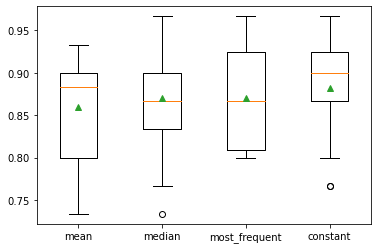

In [95]:
#Comparing Different Imputed Statistics
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m',RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [97]:
#SimpleImputer Transform When Making a Prediction
# constant imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m',RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])


Predicted Class: 2


# How to Use KNN Imputation

###  Missing values must be marked with NaN values and can be replaced with nearest neighbor estimated values.
###  How to load a CSV file with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
###  How to impute missing values with nearest neighbor models as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.


### Overview
### 1. k-Nearest Neighbor Imputation
### 2. Horse Colic Dataset
### 3. Nearest Neighbor Imputation With KNNImputer

In [100]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))


    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

In [101]:
#Nearest Neighbor Imputation with KNNImputer
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))


Missing: 1605
Missing: 0


In [102]:
#KNNImputer and Model Evaluation
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.860 (0.050)


>1 0.864 (0.051)
>3 0.867 (0.055)
>5 0.856 (0.059)
>7 0.863 (0.055)
>9 0.861 (0.058)
>15 0.866 (0.055)
>18 0.862 (0.052)
>21 0.859 (0.061)


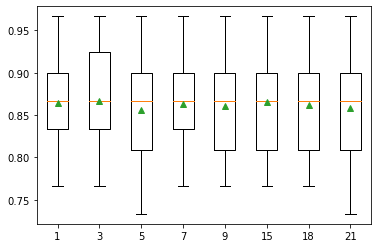

In [103]:
#KNNImputer and Different Number of Neighbors
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m',RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


In [104]:
#KNNImputer Transform When Making a Prediction
# knn imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m',RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


# How to Use Iterative Imputation

###  Missing values must be marked with NaN values and can be replaced with iteratively estimated values.
###  How to load a CSV value with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
###  How to impute missing values with iterative models as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.


### Overview
### 1. Iterative Imputation
### 2. Horse Colic Dataset
### 3. Iterative Imputation With IterativeImputer

In [107]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))


    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

In [108]:
#Iterative Imputation With IterativeImputer
# iterative imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [110]:
#IterativeImputer and Model Evaluation
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.867 (0.052)


>ascending 0.864 (0.052)
>descending 0.867 (0.054)
>roman 0.869 (0.052)
>arabic 0.872 (0.054)
>random 0.876 (0.047)


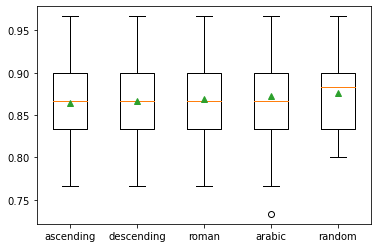

In [111]:
#IterativeImputer and Different Imputation Order
# compare iterative imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m',RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


>1 0.874 (0.050)
>2 0.877 (0.052)
>3 0.880 (0.053)
>4 0.867 (0.055)
>5 0.870 (0.048)
>6 0.870 (0.054)
>7 0.870 (0.052)
>8 0.870 (0.052)
>9 0.870 (0.050)
>10 0.870 (0.054)
>11 0.872 (0.055)
>12 0.872 (0.054)
>13 0.870 (0.054)
>14 0.873 (0.047)
>15 0.871 (0.046)
>16 0.870 (0.057)
>17 0.871 (0.049)
>18 0.871 (0.054)
>19 0.872 (0.054)
>20 0.873 (0.057)


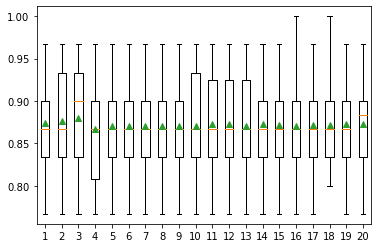

In [114]:
#IterativeImputer and Different Number of Iterations
# compare iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [115]:
#IterativeImputer Transform When Making a Prediction
# iterative imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
